In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.stats import gaussian_kde

In [14]:
char_df = pd.read_csv('..\Data\preprocessed_data\char_with_roles_filtered.csv')

In [15]:
char_df.head()

,Wiki ID,movie ID,release date,char name,DOB,gender,heght,ethnicity,actor name,actor age,map ID,char ID,actor ID,role
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,8
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,4
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,3
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,0


In [16]:
char_df['sum_role'] = char_df.groupby('Wiki ID')['role'].transform('sum')
char_df['role_ratio'] = char_df['role'] / char_df['sum_role']
char_df = char_df.drop(columns=['sum_role'])

In [17]:
char_df.head()

,Wiki ID,movie ID,release date,char name,DOB,gender,heght,ethnicity,actor name,actor age,map ID,char ID,actor ID,role,role_ratio
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,0,0.000000
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,8,0.470588
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,4,0.235294
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,3,0.176471
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,0,0.000000


In [18]:
char_df.to_csv('..\Data\preprocessed_data\char_with_roles_and_role_ratio.csv', index=False)

We define 3 types of roles: lead, secondary, small:
- if a character has no mentions in the synopsis, we consider it a small role
- distinguishing between lead and secondary roles can be done after the observation of the distributions 

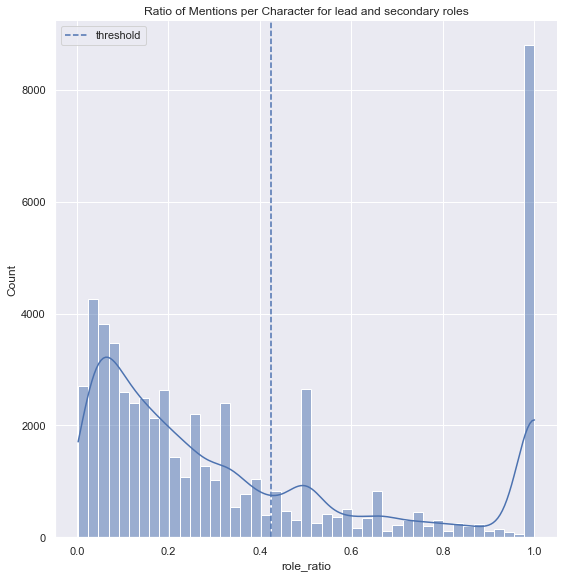

In [46]:
lead_and_secondary_roles = char_df[char_df["role_ratio"] > 0.]
graph = sns.displot(lead_and_secondary_roles["role_ratio"], kde=True, height=8).set(
    title="Ratio of Mentions per Character for lead and secondary roles"
)
plt.axvline(0.425, 0.0, 10.0, linestyle='--', label="threshold")
sns.set(rc={'figure.figsize':(20.7,16.27)})
plt.legend(loc='upper left')

Threshold for separating lead and secondary roles is 0.42 as a local minimum of kernel density estimation of ratio of mentions distribution. The interpretation is that on average there are 2 main characters with a high ratio of mentions in each plot and few characters with a low ratio of mentions

Now we assing type of role to each character in the dataframe

In [48]:
LEAD_THRESHOLD = 0.42

In [49]:
def define_role_type(x):
    if x >= LEAD_THRESHOLD:
        x = "lead"
    elif 0 < x < LEAD_THRESHOLD:
        x = "secondary"
    else:
        x = "small"
    return x

char_df["role"] = char_df["role_ratio"].apply(define_role_type)
char_df.head()

,Wiki ID,movie ID,release date,char name,DOB,gender,heght,ethnicity,actor name,actor age,map ID,char ID,actor ID,role,role_ratio
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,small,0.000000
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,lead,0.470588
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,secondary,0.235294
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,secondary,0.176471
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,small,0.000000


Let's examine the number of lead roles per actor

In [50]:
lead_actors = char_df[char_df["role"] == "lead"]["actor name"]
lead_actors_counts = lead_actors.value_counts()
lead_actors_counts

Mel Blanc            259
Mohanlal              79
Mammootty             73
John Wayne            71
Bette Davis           46
                    ... 
Jean-Louis Sbille      1
Laurie Mitchell        1
Rosyam Nor             1
Enzo the Dog           1
Richard Dolman         1
Name: actor name, Length: 8228, dtype: int64

Since a single lead role is the most frequent case, let's look on the number of lead roles for actors, who have played main characters multiple times. We also ignore Mel Blanc, who is regarded as the most prolific actor to ever work in Hollywood and obviously represents an extreme case

Text(0.5, 1.0, "Distribution of numbers of lead roles in actor's career")

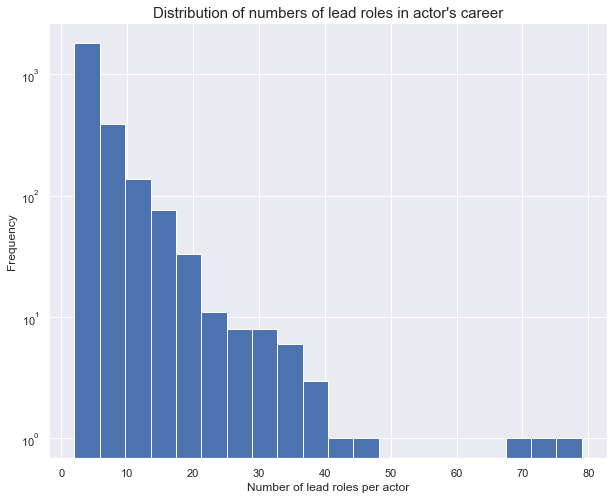

In [77]:
lead_actors_counts.where((lead_actors_counts > 1) & (lead_actors_counts < 259)).plot(
    kind="hist", figsize=(10, 8), bins=20, log=True)
plt.xlabel("Number of lead roles per actor")
plt.title("Distribution of numbers of lead roles in actor's career", fontsize=15)

Distribution of number of lead roles per actor is exponentially decreasing

In [78]:
secondary_actors = char_df[char_df["role"] == "secondary"]["actor name"]
secondary_actors_counts = secondary_actors.value_counts()
secondary_actors_counts

Mel Blanc           130
Amitabh Bachchan     62
Amrish Puri          45
Akshay Kumar         42
Salman Khan          40
                   ... 
Zuzana Fialová        1
Oldřich Kaiser        1
Ivan Barnev           1
Josef Abrhám          1
Norman Whitten        1
Name: actor name, Length: 18409, dtype: int64

In [80]:
ser1 = lead_actors_counts.index
ser2 = secondary_actors_counts.index
intersect = ser1.intersection(ser2)
print(intersect)

Index(['Mel Blanc', 'Mohanlal', 'Mammootty', 'John Wayne', 'Bette Davis',
       'James Stewart', 'Joan Crawford', 'Barbara Stanwyck', 'Burt Lancaster',
       'Gary Cooper',
       ...
       'Nathan Keyes', 'Jackie Coogan', 'Izabella Miko', 'Adriana Asti',
       'Violante Placido', 'Anu Ansari', 'Kevin J. O'Connor', 'Kevin Conroy',
       'Déborah François', 'Rosyam Nor'],
      dtype='object', length=3939)
